# Homework 04 - Logistic Regression
## 自己编程实现Logistic Regression的多分类问题。使用的数据可以是sklearn的digital数据。
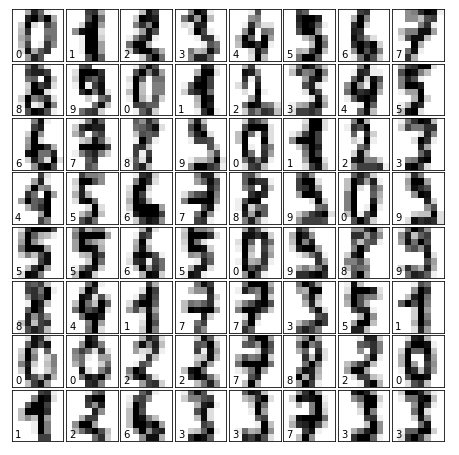
要求：  
1.自己编程实现Logistic Regression的多分类。  
2.对比自己实现与sklearn的方法的精度。  
3.如何将分类错误的样本可视化出来？ 

### 1.自己编程实现Logistic Regression的多分类。

#### 1) 导入需用库

In [11]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

#### 2) 读取数据

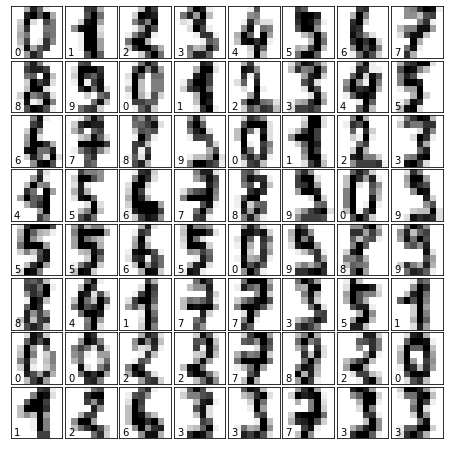

In [12]:
#读取数据
digits = load_digits()
'''
digits.data:手写数字特征向量数据集，每一个元素都是一个64维的特征向量
digits.targit:特征向量对应的标记，每个元素都是自然数0-9的数字
digits.images:对应着data中的数据，每一个元素都是8*8的二维数组，其元素代表的是灰度值
'''

#原始数据可视化
fig = plt.figure(figsize=(6, 6))  # figure的大小为宽、长(单位：inch)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])#添加子图8*8
    ax.imshow(digits.images[i], cmap=plt.cm.binary)#cmap设置颜色，或cmap=plt.get_cmap('gray_r')
    ax.text(0, 7, str(digits.target[i]))#标出数字角标


#### 3) Sigmoid

In [13]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### 4) 数据训练

In [14]:
def logistic_train(dataset):
    n = np.shape(dataset.data)[1]
    m = 400  #训练个数
    train_data = dataset.data[0:m, :]  #训练样本前200个
    weight = np.ones((10, n))  #初始化
    b = np.ones(10)
    times = 1000  #训练1000次
    alpha = 0.01  #学习率
    for t in range(10):
        label = np.copy(dataset.target[0:m])
        for x in range(m):
            if label[x] == t:  
                label[x] = 1  #1表示“相同”
            else:
                label[x] = 0  #0表示“不同”
        for i in range(times):
            num_index = list(range(m))
            for j in range(m):  #用for循环进行数据训练
                rand_index = int(np.random.uniform(0, len(num_index)))
                error = label[rand_index] - sigmoid(sum(weight[t] * train_data[rand_index]) + b[t])
                weight[t] += alpha * error * train_data[rand_index]
                b[t] += alpha * error
                del (num_index[rand_index])
    return weight,b

#### 5) 数据预测

In [18]:
def logistic_test(dataset):
    weight, b = logistic_train(dataset)
    m = 400 
    test_score = 0 #初始化score
    test_len = 64
    test_data = dataset.data[m:m+test_len, :]  #预测数据
    result = np.zeros(test_len) #初始化预测结果，用0填充
    for j in range(test_len):
        prob = np.zeros(10)
        for i in range(10):
            prob[i] = sigmoid(sum(weight[i] * test_data[j]) + b[i])
        result[j] = np.argmax(prob)  #预测结果，逐一写入result[]中
    for index in range(test_len):
        if result[index] == dataset.target[m + index]:
            test_score += 1
    test_score /= test_len
    test_score = test_score*100
    print("正确率: %f" % test_score,"%")
    plot_result(dataset, m, result)

#### 6) 结果可视化
把预测的结果，用蓝色的数字显示在每个子图的右下角。  
print正确率。

In [21]:
def plot_result(dataset, start, result):
    length = np.shape(result)[0]
    fig = plt.figure(figsize=(6, 6))  # figure1的大小为宽、长(单位：inch),和原始数据可视化相同
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) #和原始数据可视化相同
    for i in range(length):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i+start], cmap=plt.cm.binary)
        ax.text(0, 7, str(dataset.target[i+start]), size=20) #原始结果显示成黑色的
        ax.text(6, 7, str(int(result[i])), size=20, color="b") #预测的结果显示成蓝色的
    plt.show()

正确率: 85.937500 %


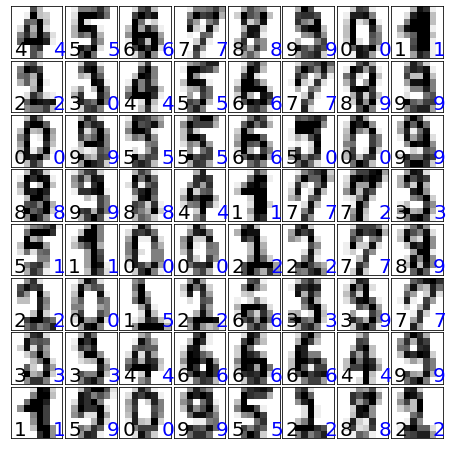

In [22]:
logistic_test(digits)

### 2.用sklearn实现。

#### 1) 导入需用库

In [24]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score

#### 2) 读取数据
digits.data:手写数字特征向量数据集，每一个元素都是一个64维的特征向量
digits.targit:特征向量对应的标记，每个元素都是自然数0-9的数字
digits.images:对应着data中的数据，每一个元素都是8*8的二维数组，其元素代表的是灰度值

In [27]:
digits = load_digits()

#### 3) 数据准备

In [28]:
m = 400 #训练数量
test = 100 #预测数量
real = digits.target[0:m+test]  #真实数据
x_train = digits.data[:m,:]  #训练数据x     
x_real = real[:m]  #原始值x       
y_train  = digits.data[m:m+test, :]  #预测数据    
y_real  = real[m:m+test]  #原始值y

#### 4) 数据训练、预测

In [29]:
logisticregression = LogisticRegression()
logisticregression.fit(x_train,x_real)  #训练数据
pre_test = logisticregression.predict(y_train)  #预测数据

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 5) 计算正确率

In [32]:
test_score = accuracy_score(y_real, pre_test)*100  #正确率
print("正确率:%f" % test_score,"%")

正确率:90.000000 %


#### 6) 结果可视化

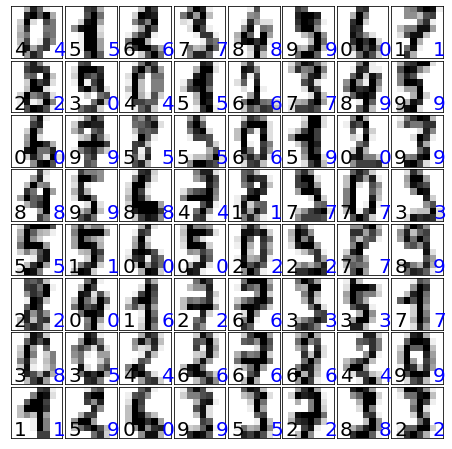

In [31]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])#添加子图8*8
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i+m]), size=20)#真实值，标在左下角
    ax.text(6, 7, str(int(pre_test[i])), size=20, color="b")#预测值，标在右下角，蓝色显示

### 3.对比自己实现与sklearn的方法的精度。
自己编程实现多分类的正确率为：85.937500 %；  
使用sklearn的方法的正确率为90.000000 %，正确率高于自己编程。